# Computer Lab 2

Work through the "Second Computer Lab" (Chapter 7) in _A Student's Guide to Python._  This exercise illustrates how to carry out "numerical experiments" to explore theoretical models.

You can use this notebook to store your code, plots, and notes, or you can write a ___script___ (see Section 3.3) that will carry out the analysis and produce the plots, and simply write your comments and observations in this notebook.  If you write a script, it should save your plot with the data and your best fit to a PDF, JPG, or PNG in this folder when it runs.

### 7.1 Creating and plotting trajectories

This section entails creating a random walk of 1000 steps described by X(n+1) = Xn +- 1 and Y(n+1) = Yn +- 1. This should produce a list of 1000 X and Y values.

In [175]:
#Import necessary libraries
import numpy as np 
import matplotlib.pyplot as plt
import scipy.special as sc
#Import random number generator
from numpy.random import default_rng
rng = default_rng()
rand = rng.random
#import factorial
from scipy.special import factorial

In [31]:
num_steps = 1000 #number of steps for the walk

X_rand = 2*(rand(num_steps) < 0.5) - 1
Y_rand = 2*(rand(num_steps) < 0.5) - 1
X = X_rand.cumsum()
Y = Y_rand.cumsum()

(-6.7, 71.39999999999999, -67.55, 10.549999999999997)

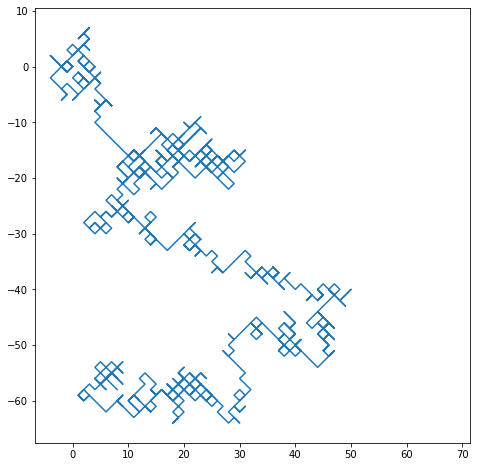

In [32]:
plt.figure(figsize = (8,8))
plt.plot(X,Y)
plt.axis('square')

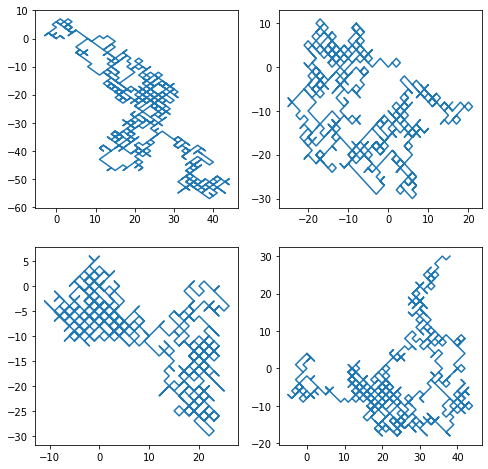

In [50]:
# Initialize x and y arrays to store X and Y from the for loop
x = np.array([np.zeros(num_steps),np.zeros(num_steps),np.zeros(num_steps),np.zeros(num_steps)])
y = np.array([np.zeros(num_steps),np.zeros(num_steps),np.zeros(num_steps),np.zeros(num_steps)])

for N in range(4):
    X_rand = 2*(rand(num_steps) < 0.5) - 1 #Generates 1000 random coin flips (+1 or -1)
    Y_rand = 2*(rand(num_steps) < 0.5) - 1 
    X = X_rand.cumsum() #Sums each element of the array to the previous value
    Y = Y_rand.cumsum()
    x[N] = X #Stores the X array into the multidemsional array x
    y[N] = Y #Stores the Y array into the multidemsional array y

#Functions for plotting 4 differnt walk trajectories
plt.figure(figsize = (8,8))
plt.axis('square')
plt.subplot(2,2,1).plot(x[0],y[0])
plt.subplot(2,2,2).plot(x[1],y[1])
plt.subplot(2,2,3).plot(x[2],y[2])
plt.subplot(2,2,4).plot(x[3],y[3])

### 7.2 Plotting Displacemnt Distribution

This section runs the trajectory simulation for a large amount of differnt trials and analyzes the endpoints and displacemnt for each.

#### Part(a)
The following code generates a scatter plot of final x and y values for a different number of trials (num_trials) and generates a scatter plot of these endpoints

Text(0.5, 0, 'Final X Value')

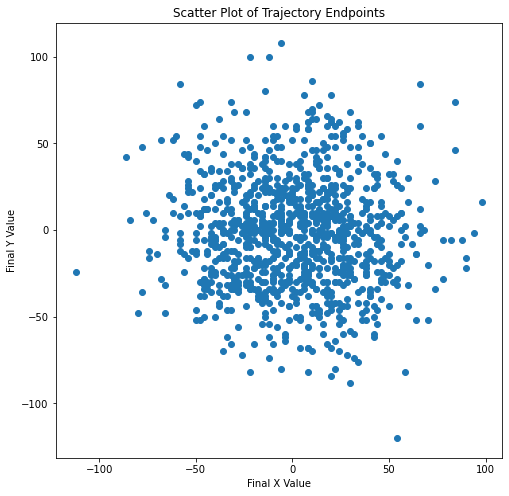

In [88]:
num_trials = 1000
x_final = np.zeros(num_trials)
y_final = np.zeros(num_trials)
displacement = np.zeros(num_trials)
for N in range(num_trials):
    X_rand = 2*(rand(num_steps) < 0.5) - 1 #Generates 1000 random coin flips (+1 or -1)
    Y_rand = 2*(rand(num_steps) < 0.5) - 1 
    X = X_rand.cumsum() #Sums each element of the array to the previous value
    Y = Y_rand.cumsum()
    x_final[N] = X[-1] #Add final X value to this array 
    y_final[N] = Y[-1] #Add final Y value to this array
    displacement[N] = np.sqrt(X[-1]**2 + Y[-1]**2) #Calculate and store dispalcemnt of of the walk

plt.figure(figsize = (8,8)) 
plt.title('Scatter Plot of Trajectory Endpoints')
plt.scatter(x_final,y_final)
plt.ylabel('Final Y Value')
plt.xlabel('Final X Value')

#### Part(b)
This section generates a histogram of the displacemnt values generated in the above cell

(array([101., 227., 229., 198., 141.,  60.,  29.,  10.,   4.,   1.]),
 array([  2.        ,  14.95902732,  27.91805464,  40.87708196,
         53.83610928,  66.7951366 ,  79.75416392,  92.71319124,
        105.67221856, 118.63124588, 131.5902732 ]),
 <BarContainer object of 10 artists>)

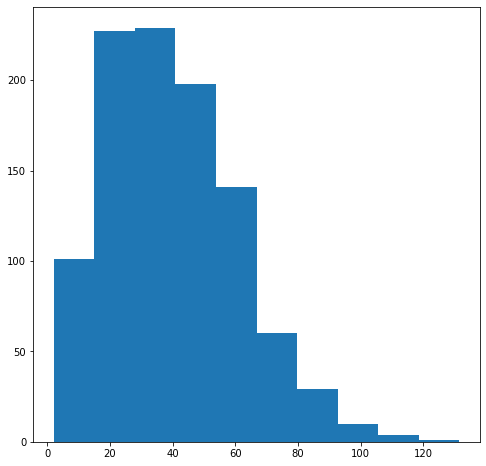

In [89]:
plt.figure(figsize = (8,8))
plt.hist(displacement)

#### Part(c)
Generate a histogram of displacement$^2$

(array([573., 254., 102.,  41.,  16.,   7.,   4.,   2.,   0.,   1.]),
 array([4.00000e+00, 1.73520e+03, 3.46640e+03, 5.19760e+03, 6.92880e+03,
        8.66000e+03, 1.03912e+04, 1.21224e+04, 1.38536e+04, 1.55848e+04,
        1.73160e+04]),
 <BarContainer object of 10 artists>)

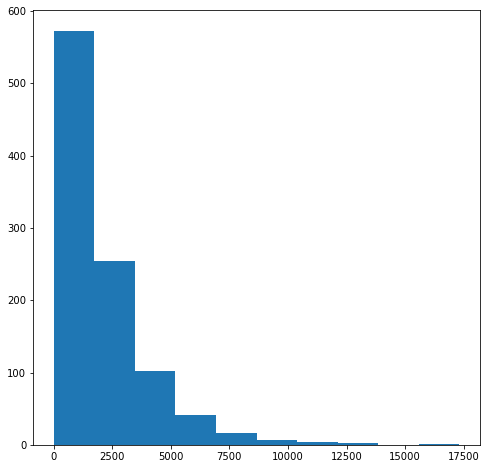

In [90]:
displacement_sq = displacement**2
plt.figure(figsize = (8,8))
plt.hist(displacement_sq)

#### Part(d)
Analyze the two histograms above and test for a exponential or power law relationship using semi-log and log-log plots

Text(0.5, 1.0, 'Log-Log of Displacement vs Displacement^2')

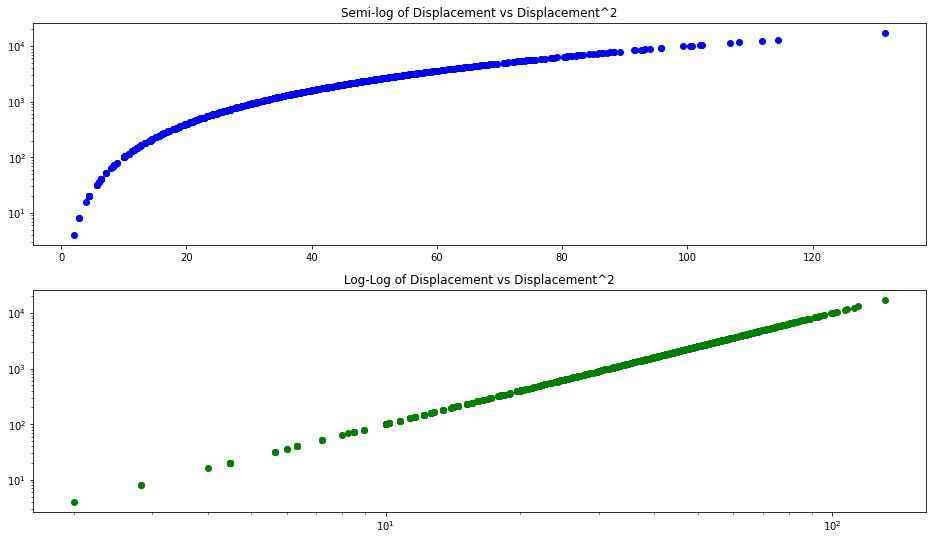

In [112]:
plt.figure(figsize = (16,9))
plt.subplot(2,1,1).semilogy(displacement,displacement_sq,"ob")
plt.title('Semi-log of Displacement vs Displacement^2')
plt.subplot(2,1,2).loglog(displacement,displacement_sq,"og")
plt.title('Log-Log of Displacement vs Displacement^2')

The semi-log plot shows a non-linear (exponential) relationship indicating that there is not an exponential law relationship between displacement and displacement$^2$. The log-log plot on the other hand shows a linear relationship indicating that that a power law relationship exists betwene displacement and displacement$^2$.

#### Part(e) 
This seciton evaluates the mean of the displacement$^2$ values for a test with 1000 steps

In [118]:
disp_sq_avg = np.mean(displacement_sq)
print("The average value of displacment squared is: {} ".format(disp_sq_avg))

The average value of displacment squared is: 2016.52 


#### Part(f)
Evaluating the mean-square displacemnt of a 4000 walk step. Essentially, all the above code is repurposed except without the plots. 

In [127]:
num_trials = 1000
num_steps = 4000
x_final = np.zeros(num_trials)
y_final = np.zeros(num_trials)
displacement = np.zeros(num_trials)
for N in range(num_trials):
    X_rand = 2*(rand(num_steps) < 0.5) - 1 #Generates 1000 random coin flips (+1 or -1)
    Y_rand = 2*(rand(num_steps) < 0.5) - 1 
    X = X_rand.cumsum() #Sums each element of the array to the previous value
    Y = Y_rand.cumsum()
    x_final[N] = X[-1] #Add final X value to this array 
    y_final[N] = Y[-1] #Add final Y value to this array
    displacement[N] = np.sqrt(X[-1]**2 + Y[-1]**2) #Calculate and store dispalcemnt of of the walk

displacement_sq = displacement**2
disp_sq_avg = np.mean(displacement_sq)
print("The average value of displacment squared is: {} ".format(disp_sq_avg))

The average value of displacment squared is: 7917.152 


How does the mean square displacement depend on the number of steps in a walk? 

In [169]:
num_trials = 1000
num_steps = np.array([1000,2000,3000,4000,5000])
x_final = np.zeros(num_trials)
y_final = np.zeros(num_trials)
displacement = np.zeros(num_trials)
Disp = np.array([np.zeros(num_trials),np.zeros(num_trials),np.zeros(num_trials),np.zeros(num_trials),np.zeros(num_trials)])
a = 0
for i in num_steps:
    for N in range(num_trials):
        X_rand = 2*(rand(i) < 0.5) - 1 #Generates 1000 random coin flips (+1 or -1)
        Y_rand = 2*(rand(i) < 0.5) - 1 
        X = X_rand.cumsum() #Sums each element of the array to the previous value
        Y = Y_rand.cumsum()
        x_final[N] = X[-1] #Add final X value to this array 
        y_final[N] = Y[-1] #Add final Y value to this array
        displacement[N] = np.sqrt(X[-1]**2 + Y[-1]**2) #Calculate and store dispalcemnt of of the walk
    Disp[a] = displacement
    a = a+1

displacement_sq = Disp**2
disp_sq_avg1000 = displacement_sq[0].mean()
disp_sq_avg2000 = displacement_sq[1].mean()
disp_sq_avg3000 = displacement_sq[2].mean()
disp_sq_avg4000 = displacement_sq[3].mean()
disp_sq_avg5000 = displacement_sq[4].mean()
disp_sq_avg = np.array([disp_sq_avg1000,disp_sq_avg2000,disp_sq_avg3000,disp_sq_avg4000,disp_sq_avg5000])

print("For num_steps = {} the average value of displacment squared is {} ".format(num_steps[0],disp_sq_avg1000))
print("For num_steps = {} the average value of displacment squared is {} ".format(num_steps[1],disp_sq_avg2000))
print("For num_steps = {} the average value of displacment squared is {} ".format(num_steps[2],disp_sq_avg3000))
print("For num_steps = {} the average value of displacment squared is {} ".format(num_steps[3],disp_sq_avg4000))
print("For num_steps = {} the average value of displacment squared is {} ".format(num_steps[4],disp_sq_avg5000))

For num_steps = 1000 the average value of displacment squared is 2041.388 
For num_steps = 2000 the average value of displacment squared is 3748.136 
For num_steps = 3000 the average value of displacment squared is 5708.488 
For num_steps = 4000 the average value of displacment squared is 8265.28 
For num_steps = 5000 the average value of displacment squared is 9937.472 


Text(0.5, 0, 'Number of Steps')

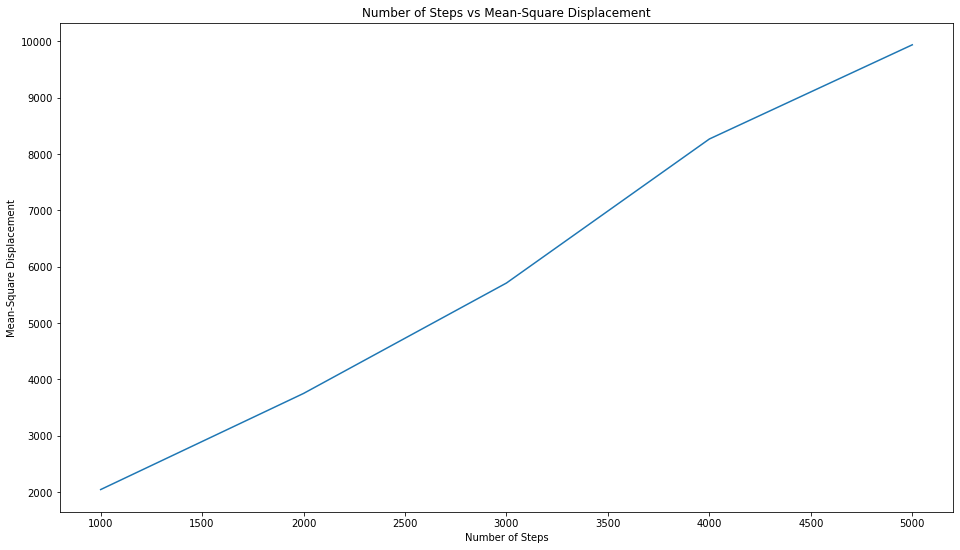

In [173]:
plt.figure(figsize = (16,9))
plt.plot(num_steps,disp_sq_avg)
plt.title('Number of Steps vs Mean-Square Displacement')
plt.ylabel('Mean-Square Displacement')
plt.xlabel('Number of Steps')

Generating Mean-Square Displacement values for different values of num_steps (1000-5000) in 1000 different trials indicates linear growth in mean-square displacment as the number of steps inceases. 

### 7.3 Rare Events
This section dives into utilizing the Poisson Distribution to analyze an extremely unfair coin where the probability of flipping heads is `P = 0.08`. The Poisson Distribution for heads comming up $l$ times in $100$ flips is: $P(l) = \dfrac{e^-8 *8^l}{l!}$ where l is an integer $>= 0 $

#### Part(a) 
Analyze the function $P(l)$ for different values of $l$

In [206]:
l = np.arange(0,21,1)
p_l = (np.exp(-8) * 8**l / sc.factorial(l))

The function of $P(l)$ gets very small very quickly for a range of $0<=l<=20$

#### Part(b)
Create an unfair coin flipped `num_flips=100` times with $P(heads) = 0.08$

In [303]:
#Random Number generator was already setup in the beginning of the notebook
N = 100 #number of trials
num_flips = 100
M = np.zeros(N)

for i in range(N):
    flip = 2*(rand(num_flips) < 0.08) - 1 #Similar coin flipping code as before but adjusted to produce a head flip for anything less than 0.08
    heads_count = (flip==1)
    count = heads_count.sum() #number of heads flipped out of N flips
    M[i] = count

#### Part(c)
Count the number of heads from the flip generator in the above cell (implemented into the for loop above) and produce a histogram of the data to see the frequency of getting M heads in N trials

(array([ 4.,  1.,  5., 31., 18., 10., 17.,  6.,  3.,  5.]),
 array([ 2. ,  3.3,  4.6,  5.9,  7.2,  8.5,  9.8, 11.1, 12.4, 13.7, 15. ]),
 <BarContainer object of 10 artists>)

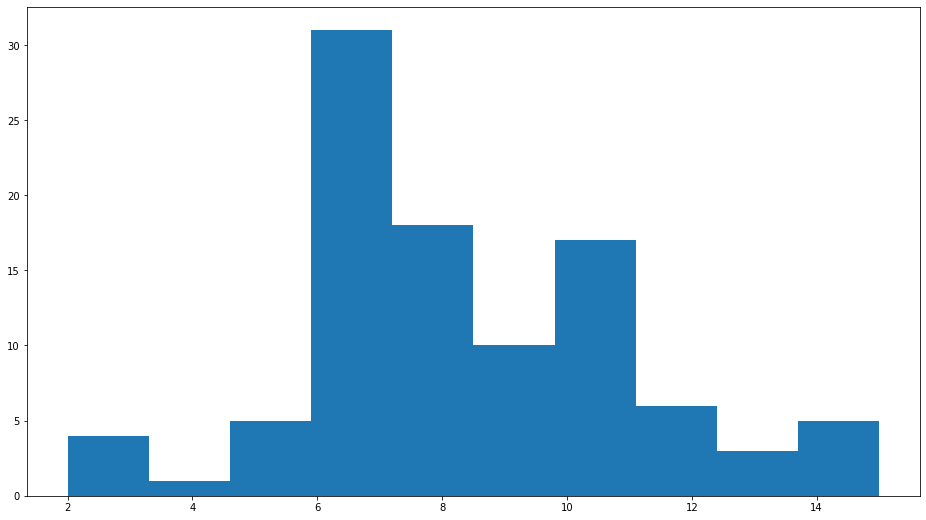

In [304]:
plt.figure(figsize = (16,9))
plt.hist(M)

#### Part(d)
Graph the Poisson distribution multiplied by N onto the above histogram

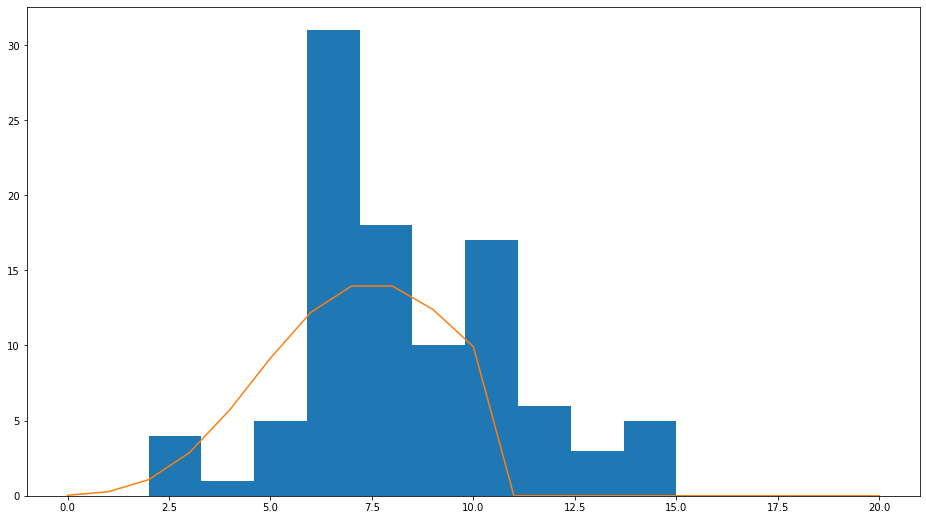

In [305]:
plt.figure(figsize = (16,9))
plt.hist(M)
l = np.arange(0,21,1)
p_l = (np.exp(-8) * 8**l / sc.factorial(l)) * N
plt.plot(p_l)

#### Part(e)
Repeating part(b-d) for N = 1,000,000

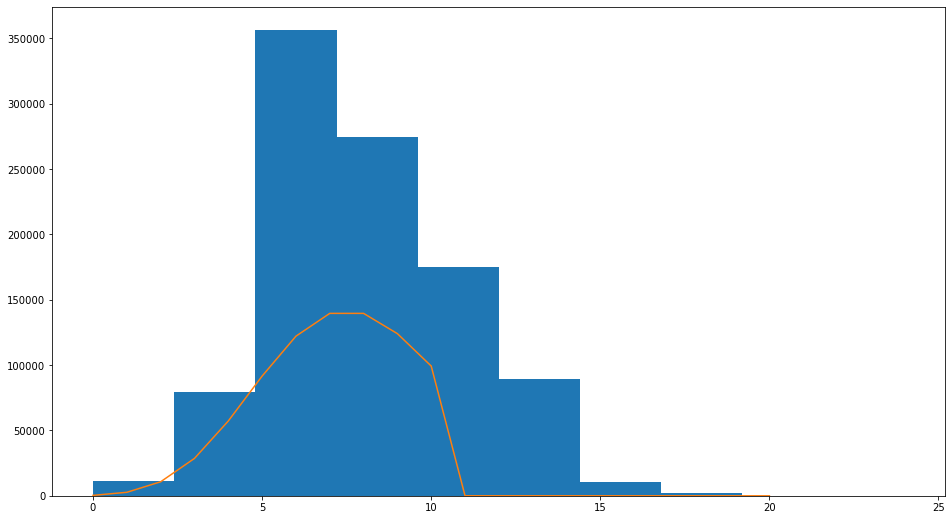

In [306]:
#Random Number generator was already setup in the beginning of the notebook
N = 1000000 #number of trials
num_flips = 100
M = np.zeros(N)

for i in range(N):
    flip = 2*(rand(num_flips) < 0.08) - 1 #Similar coin flipping code as before but adjusted to produce a head flip for anything less than 0.08
    heads_count = (flip==1)
    count = heads_count.sum() #number of heads flipped out of N flips
    M[i] = count

plt.figure(figsize = (16,9))
plt.hist(M)
l = np.arange(0,21,1)
p_l = (np.exp(-8) * 8**l / sc.factorial(l)) * N
plt.plot(p_l)

The trial for `N=1,000,000` shows a similar histogram to the above trials and matches the Poisson distribution fairly well. The most frequent number of heads aligns with the peak of the poisson distribution curve. 

### 7.3.2 Waiting Times

We can turn the random coin flip scenario into a time series called a Poisson process that should look like a long string of zeros (tails) with a few ones (heads) intermixed due to the low probability of flipping heads. 

In [358]:
num_flips = 1000 #number of flips of the unfair coin
flips = (rand(num_flips) < 0.08) - 1 + 1
ones = np.nonzero(flips)
diff_ones = np.diff(ones).flatten()

(array([30., 22., 10., 13.,  7.,  3.,  4.,  1.,  2.,  2.]),
 array([ 1. ,  4.9,  8.8, 12.7, 16.6, 20.5, 24.4, 28.3, 32.2, 36.1, 40. ]),
 <BarContainer object of 10 artists>)

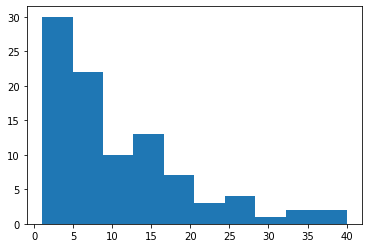